In [1]:
!ls -l

total 2016
-rw-r--r--   1 cesare.chung  staff  235387 10 15 14:12 DR_MultiClasses_Rev.ipynb
-rw-r--r--   1 cesare.chung  staff  188157 10 10 22:27 UNET_Mura2.ipynb
-rw-r--r--@  1 cesare.chung  staff    1914  9 30 21:54 UNET_Mura2.py
-rw-r--r--   1 cesare.chung  staff  467141 10 10 21:51 UNET_test.ipynb
-rw-r--r--@  1 cesare.chung  staff    1291  9 30 12:23 UNET_test.py
-rw-r--r--   1 cesare.chung  staff  120900 10 14 22:15 UNET_tf.ipynb
-rw-r--r--@  1 cesare.chung  staff     644 10  5 12:01 UNET_tf.py
drwxr-xr-x  20 cesare.chung  staff     680 10 12 21:58 _PML2nd
drwxr-xr-x@ 11 cesare.chung  staff     374 10 13 21:34 _Python-machine-learning-book-2nd-edition-master
drwxr-xr-x   4 cesare.chung  staff     136 10 10 21:58 cache
drwxr-xr-x   4 cesare.chung  staff     136 10 12 23:01 docs
drwxr-xr-x   2 cesare.chung  staff      68 10 13 11:41 prediction
drwxr-xr-x   7 cesare.chung  staff     238 10 10 21:49 unet_trained


In [2]:
#from IPython.display import display
#import tensorflow as tf
import numpy as np
import pandas as pd
import scipy
from scipy.stats import scoreatpercentile
from pandas.tools.plotting import scatter_matrix
from pandas import DataFrame

import os
import matplotlib.pyplot as plt
#import matplotlib as plt
#import seaborn as sns

import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

import mglearn
import tflearn
from tflearn.data_utils import load_image

print ("NumPy version", np.__version__)
print ("SciPy version", scipy.__version__)
print ("Pandas version", pd.__version__)

NumPy version 1.12.1
SciPy version 0.19.0
Pandas version 0.20.1


In [3]:
SCRIPT_PATH = '/Users/cesare.chung/int/02_PPT_Mura/NEW'
#
imgs = []
num = 5
for i in range(1, num + 1):
    img = load_image("%s/train/%s.jpg" % (SCRIPT_PATH, i))
#    img = img.resize((224,224))
    img = img.resize((270,506))
    img_arr = np.asarray(img)
    imgs.append(img_arr)
#
imgs = np.array(imgs)


In [4]:
print ("Shape of imgs", imgs.shape)


Shape of imgs (5, 506, 270, 4)


Mura Images Shape = (506, 270, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


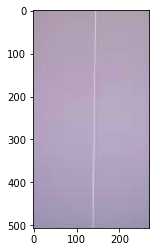

Mura Images Shape = (506, 270, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


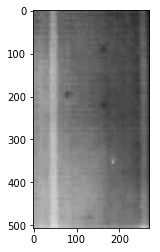

Mura Images Shape = (506, 270, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


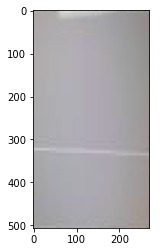

Mura Images Shape = (506, 270, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


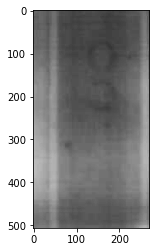

Mura Images Shape = (506, 270, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


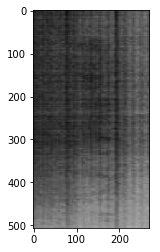

In [5]:
'''
#################################
# Show pictures                 #
#################################
#
for i in range(num):
    plt.imshow(imgs[i])
    plt.show()
#
'''

#################################
# Show pictures / shape         #
#################################
for i in range(num):
    input_image = imgs[i]
    print ('Mura Images Shape = {}'.format(input_image.shape))
    print ('Mura Images Dim.  = {}'.format(input_image.ndim))
    print ('Mura Images Type  = {}'.format(input_image.dtype))
    plt.imshow(imgs[i])
    plt.show()
#

imgs = imgs / 255
#imgs = imgs.reshape(1,224, 224,4)
imgs = imgs.transpose(0,3,1,2)

In [6]:
print ("Shape of img_arr", img_arr.shape)

print ("Shape of imgs", imgs.shape)

Shape of img_arr (506, 270, 4)
Shape of imgs (5, 4, 506, 270)


In [7]:
Image0 = imgs[0]

print ("Shape of Image0", Image0.shape)

Shape of Image0 (4, 506, 270)


In [8]:
Image0 = imgs[0,0]      # Set the input images

print ("Shape of Image0", Image0.shape)

#Image0 = imgs[0,1]
#Image0 = imgs[0,2]
#Image0 = imgs[0,3]

#Image0 = imgs[1,0]
#Image0 = imgs[1,1]
#Image0 = imgs[1,2]
#Image0 = imgs[1,3]

# ...

#######################################
# Dump a NumPy array into a csv file  #
#######################################
#DF0 = pd.DataFrame(Image0)
#DF0.to_csv("/Users/cesare.chung/int/02_PPT_Mura/Image0.csv",header=None)
#######################################
# Dump a NumPy array into a csv file  #
#######################################


Shape of Image0 (506, 270)


Images Data Points = 136620
xmax = 506
ymax = 270
Image0[20,20] = 0.6784313725490196


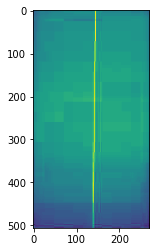

In [9]:
Size0 = Image0.shape[0] * Image0.shape[1]
print('Images Data Points = {}'.format(Size0))

Image0.size
xmax = Image0.shape[0]
ymax = Image0.shape[1]

print('xmax = {}'.format(xmax))
print('ymax = {}'.format(ymax))

Image0[20,20]

print('Image0[20,20] = {}'.format(Image0[20,20]))

list(range(xmax))
list(range(ymax))

#print('list(range(xmax)) = {}'.format(list(range(xmax))))
#print('list(range(ymax)) = {}'.format(list(range(ymax))))

# Plot Lena with diagonal lines set to 0
plt.imshow(Image0)
plt.show()


In [10]:
##################################################################### 506 X 270
#
X0 = np.zeros((Size0,2))
X0 = np.zeros((Image0.size,2))
Y0 = np.zeros(Image0.size)
#Y0 = Image0.reshape(Size0, 1)

print ("Shape of X0 : ", X0.shape)
print ("Shape of Y0 : ", Y0.shape)

avg=np.mean(Image0)
Max0 = Image0.max()
Min0 = Image0.min()
Std0 = Image0.std()
med=np.median(Image0)
np.percentile(Image0, 50)
percentile25=np.percentile(Image0, 25)
percentile75=np.percentile(Image0, 75)

print ("Mean :                   ", avg)
print ("Max :                    ", Max0)
print ("Min :                    ", Min0)
print ("Std :                    ", Std0)
print ("Score at percentile 25 : ", scoreatpercentile(Image0, 25))
print ("Score at percentile 50 : ", scoreatpercentile(Image0, 50))
print ("Score at percentile 75 : ", scoreatpercentile(Image0, 75))


Shape of X0 :  (136620, 2)
Shape of Y0 :  (136620,)
Mean :                    0.690717949601
Max :                     0.835294117647
Min :                     0.545098039216
Std :                     0.0321395738324
Score at percentile 25 :  0.678431372549
Score at percentile 50 :  0.698039215686
Score at percentile 75 :  0.713725490196


In [11]:
#
'''
for i in range(Image0.shape[0]):
    for j in range(Image0.shape[1]):
        X0[j+i*270]=[i,j]
        if Image0[i,j] > percentile75: 
           Y0[j+i*270]=2
        else:
           if Image0[i,j] < percentile25:
              Y0[j+i*270]=1
           else:
              Y0[j+i*270]=0
'''

for i in range(Image0.shape[0]):
    for j in range(Image0.shape[1]):
        X0[j+i*270]=[i,j]
        if (Image0[i,j] > percentile75) & (Image0[i,j] <= Max0):
           Y0[j+i*270]=3
        else:
           if (Image0[i,j] > percentile25) & (Image0[i,j] <= percentile75):
              Y0[j+i*270]=2
           else:
              if (Image0[i,j] > Min0) & (Image0[i,j] < percentile25):
                 Y0[j+i*270]=1
              else:
                 Y0[j+i*270]=0


Y0=Y0.astype(np.integer)

In [12]:
print ("Shape of X0 : ", X0.shape)
print ("Shape of Y0 : ", Y0.shape)

print ("X0 = ", X0)
print ("Y0 = ", Y0)

Shape of X0 :  (136620, 2)
Shape of Y0 :  (136620,)
X0 =  [[   0.    0.]
 [   0.    1.]
 [   0.    2.]
 ..., 
 [ 505.  267.]
 [ 505.  268.]
 [ 505.  269.]]
Y0 =  [1 1 1 ..., 1 1 1]


In [13]:
df_Y0 = pd.DataFrame(Y0)

df_Y0[0].values

Counts0 = df_Y0[0].value_counts()
print(Counts0)
#

print('Class labels:', np.unique(df_Y0))


2    76311
1    32888
3    22961
0     4460
Name: 0, dtype: int64
Class labels: [0 1 2 3]


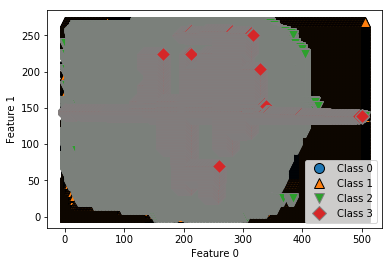

In [14]:
mglearn.discrete_scatter(X0[:, 0], X0[:, 1], Y0)
#plt.scatter(X0[:,0], X0[:,1], s=40, c=Y0, cmap=plt.cm.Spectral)
#plt.scatter(X0[:,0], X0[:,1], s=10, c=Y0)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2","Class 3"])
plt.show()

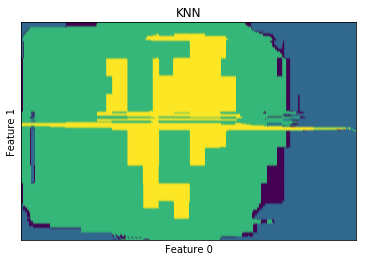

In [15]:
#
############################# Modeling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
############################# Modeling 
#
######################
# KNN                #
######################

knn = KNeighborsClassifier(n_neighbors= 3).fit(X0, Y0)

#mglearn.plots.plot_2d_classification(knn, X0, fill=True, alpha=.7)
#mglearn.plots.plot_2d_classification(knn, X0, fill=True, eps=0.91,alpha=.17)
mglearn.plots.plot_2d_separator(knn, X0, fill=True, eps=0.5,alpha=.7)

plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0)
#plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0, cmap=plt.cm.Spectral)
#plt.scatter(X0[:, 0], X0[:, 1], s=10, c=Y0)

plt.title("KNN")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [16]:
#
def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):
    """ Create a custom diverging colormap with three colors
        
        Default is blue to white to red with 11 colors.  Colors can be specified
        in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """
    
    from matplotlib.colors import LinearSegmentedColormap
    
    cmap = LinearSegmentedColormap.from_list(name=name,
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap
#


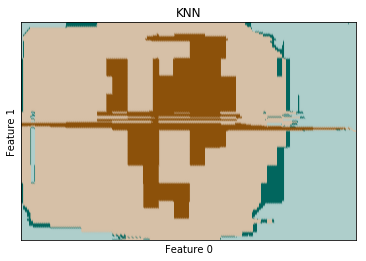

In [17]:
######################
# KNN                #
######################

knn = KNeighborsClassifier(n_neighbors= 100).fit(X0, Y0)

#plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0, cmap=plt.cm.get_cmap('Blues'))
plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0, cmap=custom_div_cmap(numcolors=51, mincol='#01665e', maxcol='#8c510a'))

#mglearn.plots.plot_2d_separator(knn, X0, fill=True, eps=6.5,alpha=.7)

mglearn.plots.plot_2d_classification(knn, X0, fill=True, eps=0.91,alpha=.17)

plt.title("KNN")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()